In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from fbprophet import Prophet
import plotly.figure_factory as ff
import json

In [2]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [3]:
avocado_df=pd.read_csv('Avocado.csv')

In [4]:
avocado_df

Date  AveragePrice  Total Volume     4046      4225    4770  \
0      2015-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1      2015-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2      2015-01-18          1.17      44511.28   914.14  31540.32  135.77   
3      2015-01-25          1.06      45147.50   941.38  33196.16  164.14   
4      2015-02-01          0.99      70873.60  1353.90  60017.20  179.32   
...           ...           ...           ...      ...       ...     ...   
27318  2015-11-22          1.97       6249.43  1733.40   2873.92   30.95   
27319  2015-11-29          2.08       4638.10  1395.02   2238.04   61.71   
27320  2015-12-13          1.80       7836.65  2194.49   2981.01   25.97   
27321  2015-12-20          1.92       6255.19  1512.45   2407.32   11.78   
27322  2015-12-27          1.81       7155.63  1478.79   2629.64   14.10   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         9716.46     9186.93      529.53          0.0  conventional  2015   
1         8424.77     8036.04      388.73          0.0  conventional  2015   
2        11921.05    11651.09      269.96          0.0  conventional  2015   
3        10845.82    10103.35      742.47          0.0  conventional  2015   
4         9323.18     9170.82      152.36          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
27318     1611.16     1590.00       21.16          0.0       organic  2015   
27319      943.33      943.33        0.00          0.0       organic  2015   
27320     2635.18     2598.45       36.73          0.0       organic  2015   
27321     2323.64     2213.72      109.92          0.0       organic  2015   
27322     3033.10     2855.55      177.55          0.0       organic  2015   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
27318  WestTexNewMexico  
27319  WestTexNewMexico  
27320  WestTexNewMexico  
27321  WestTexNewMexico  
27322  WestTexNewMexico  

[27323 rows x 13 columns]

In [5]:
avocado_df.shape

(27323, 13)

In [7]:
avocado_df.isnull()

Date  AveragePrice  Total Volume   4046   4225   4770  Total Bags  \
0      False         False         False  False  False  False       False   
1      False         False         False  False  False  False       False   
2      False         False         False  False  False  False       False   
3      False         False         False  False  False  False       False   
4      False         False         False  False  False  False       False   
...      ...           ...           ...    ...    ...    ...         ...   
27318  False         False         False  False  False  False       False   
27319  False         False         False  False  False  False       False   
27320  False         False         False  False  False  False       False   
27321  False         False         False  False  False  False       False   
27322  False         False         False  False  False  False       False   

       Small Bags  Large Bags  XLarge Bags   type   year  region  
0           False       False        False  False  False   False  
1           False       False        False  False  False   False  
2           False       False        False  False  False   False  
3           False       False        False  False  False   False  
4           False       False        False  False  False   False  
...           ...         ...          ...    ...    ...     ...  
27318       False       False        False  False  False   False  
27319       False       False        False  False  False   False  
27320       False       False        False  False  False   False  
27321       False       False        False  False  False   False  
27322       False       False        False  False  False   False  

[27323 rows x 13 columns]

In [16]:
avocado_df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  27323.000000  2.732300e+04  2.732300e+04  2.732300e+04  2.732300e+04   
mean       1.400632  9.135469e+05  2.953187e+05  2.901059e+05  2.215868e+04   
std        0.385439  3.702672e+06  1.273010e+06  1.187227e+06  1.031329e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.110000  1.361412e+04  7.964250e+02  2.922980e+03  0.000000e+00   
50%        1.370000  1.198654e+05  1.003785e+04  2.568849e+04  1.926900e+02   
75%        1.640000  4.747205e+05  1.133179e+05  1.454464e+05  5.898300e+03   
max        3.250000  6.371614e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  2.732300e+04  2.732300e+04  2.732300e+04   27323.000000  27323.000000  
mean   3.058740e+05  2.186982e+05  8.202537e+04    5150.387571   2016.956593  
std    1.274851e+06  8.881292e+05  3.917356e+05   30719.207766      1.406539  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    7.703605e+03  5.283050e+03  2.773700e+02       0.000000   2016.000000  
50%    4.775039e+04  3.223150e+04  4.312490e+03       0.000000   2017.000000  
75%    1.461021e+05  1.048424e+05  3.268494e+04     450.665000   2018.000000  
max    2.347299e+07  1.543625e+07  8.378356e+06  844929.830000   2019.000000

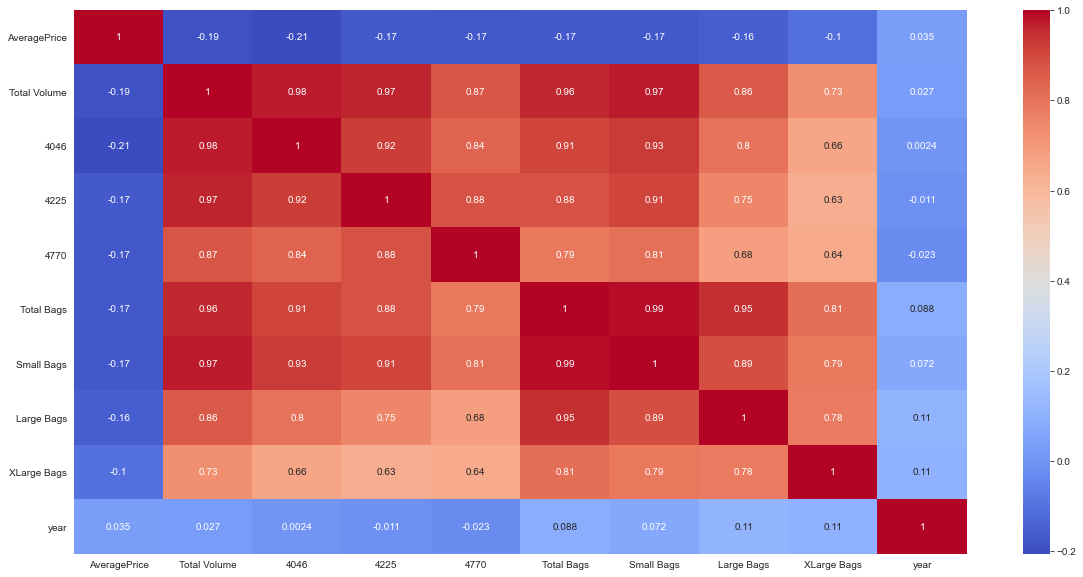

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(avocado_df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [8]:
avocado_df.head()

Date  AveragePrice  Total Volume     4046      4225    4770  \
0  2015-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1  2015-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2  2015-01-18          1.17      44511.28   914.14  31540.32  135.77   
3  2015-01-25          1.06      45147.50   941.38  33196.16  164.14   
4  2015-02-01          0.99      70873.60  1353.90  60017.20  179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9716.46     9186.93      529.53          0.0  conventional  2015  Albany  
1     8424.77     8036.04      388.73          0.0  conventional  2015  Albany  
2    11921.05    11651.09      269.96          0.0  conventional  2015  Albany  
3    10845.82    10103.35      742.47          0.0  conventional  2015  Albany  
4     9323.18     9170.82      152.36          0.0  conventional  2015  Albany

In [9]:
avocado_df.tail(20)

Date  AveragePrice  Total Volume     4046     4225   4770  \
27303  2015-08-09          1.86      10167.70  3994.02  3545.80   0.00   
27304  2015-08-16          1.66      11538.97  3284.92  5434.82   0.00   
27305  2015-08-23          1.61      11341.36  5070.74  3018.12   0.00   
27306  2015-08-30          1.69      11459.06  4328.13  3911.96   0.00   
27307  2015-09-06          1.78      10554.69  3494.93  3556.76   0.00   
27308  2015-09-13          1.99       6608.39  1309.78  3114.34   0.00   
27309  2015-09-20          2.19       5023.44   896.41  2911.75   0.00   
27310  2015-09-27          1.76       8150.95  1500.18  5237.43   0.00   
27311  2015-10-04          2.01       8059.96  1690.85  3621.73   0.00   
27312  2015-10-11          2.05       7346.43  1544.38  3601.95   0.00   
27313  2015-10-18          2.02       7664.36  1523.54  3491.30   0.00   
27314  2015-10-25          2.00       6447.44  1235.04  2895.73   0.00   
27315  2015-11-01          1.92       7296.25  1652.42  3123.83   0.00   
27316  2015-11-08          1.98       7603.07  2198.14  3139.24  26.37   
27317  2015-11-15          1.92       8175.94  1925.21  3271.43  16.72   
27318  2015-11-22          1.97       6249.43  1733.40  2873.92  30.95   
27319  2015-11-29          2.08       4638.10  1395.02  2238.04  61.71   
27320  2015-12-13          1.80       7836.65  2194.49  2981.01  25.97   
27321  2015-12-20          1.92       6255.19  1512.45  2407.32  11.78   
27322  2015-12-27          1.81       7155.63  1478.79  2629.64  14.10   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
27303     2627.88     2516.67      111.21          0.0  organic  2015   
27304     2819.23     2726.66       92.57          0.0  organic  2015   
27305     3252.50     2216.67     1035.83          0.0  organic  2015   
27306     3218.97     2383.33      835.64          0.0  organic  2015   
27307     3503.00     2866.67      636.33          0.0  organic  2015   
27308     2184.27     1763.34      420.93          0.0  organic  2015   
27309     1215.28     1190.00       25.28          0.0  organic  2015   
27310     1413.34     1406.67        6.67          0.0  organic  2015   
27311     2747.38     2723.34       24.04          0.0  organic  2015   
27312     2200.10     2173.33       26.77          0.0  organic  2015   
27313     2649.52     2606.66       42.86          0.0  organic  2015   
27314     2316.67     2316.67        0.00          0.0  organic  2015   
27315     2520.00     2520.00        0.00          0.0  organic  2015   
27316     2239.32     2223.34       15.98          0.0  organic  2015   
27317     2962.58     2946.66       15.92          0.0  organic  2015   
27318     1611.16     1590.00       21.16          0.0  organic  2015   
27319      943.33      943.33        0.00          0.0  organic  2015   
27320     2635.18     2598.45       36.73          0.0  organic  2015   
27321     2323.64     2213.72      109.92          0.0  organic  2015   
27322     3033.10     2855.55      177.55          0.0  organic  2015   

                 region  
27303  WestTexNewMexico  
27304  WestTexNewMexico  
27305  WestTexNewMexico  
27306  WestTexNewMexico  
27307  WestTexNewMexico  
27308  WestTexNewMexico  
27309  WestTexNewMexico  
27310  WestTexNewMexico  
27311  WestTexNewMexico  
27312  WestTexNewMexico  
27313  WestTexNewMexico  
27314  WestTexNewMexico  
27315  WestTexNewMexico  
27316  WestTexNewMexico  
27317  WestTexNewMexico  
27318  WestTexNewMexico  
27319  WestTexNewMexico  
27320  WestTexNewMexico  
27321  WestTexNewMexico  
27322  WestTexNewMexico

In [10]:
avocado_df=avocado_df.sort_values('Date')

In [11]:
avocado_df

Date  AveragePrice  Total Volume        4046       4225  \
0      2015-01-04          1.22      40873.28     2819.50   28287.42   
20999  2015-01-04          1.88      48280.46     4476.73   22389.09   
20947  2015-01-04          1.93      17328.24     2357.18   12692.21   
20895  2015-01-04          1.41       2604.25      220.61      23.64   
1771   2015-01-04          1.19     166006.29    29419.03   47220.75   
...           ...           ...           ...         ...        ...   
11332  2019-12-01          1.04     332956.00   127604.00   27335.00   
19175  2019-12-01          1.80       9482.00     1112.00     614.00   
11533  2019-12-01          0.77    5751174.00  2751497.00  693683.00   
252    2019-12-01          1.15      88296.00     3121.00   70033.00   
15685  2019-12-01          2.00       8389.00        7.00    2728.00   

           4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0         49.90     9716.46     9186.93      529.53          0.0   
20999     23.15    21391.49    21379.79       11.70          0.0   
20947      9.47     2269.38     2269.38        0.00          0.0   
20895      0.00     2360.00     2360.00        0.00          0.0   
1771   38568.95    50797.56    44329.03     6468.53          0.0   
...         ...         ...         ...         ...          ...   
11332    861.00   177157.00   121346.00    55017.00        793.0   
19175      0.00     7755.00     7251.00      505.00          0.0   
11533  88033.00  2217962.00  1306353.00   845561.00      66047.0   
252       77.00    15065.00     7087.00     7212.00        766.0   
15685     37.00     5617.00     5614.00        3.00          0.0   

               type  year            region  
0      conventional  2015            Albany  
20999       organic  2015         Northeast  
20947       organic  2015           NewYork  
20895       organic  2015  NewOrleansMobile  
1771   conventional  2015         Charlotte  
...             ...   ...               ...  
11332  conventional  2019    South Carolina  
19175       organic  2019         Las Vegas  
11533  conventional  2019     South Central  
252    conventional  2019            Albany  
15685       organic  2019         Charlotte  

[27323 rows x 13 columns]

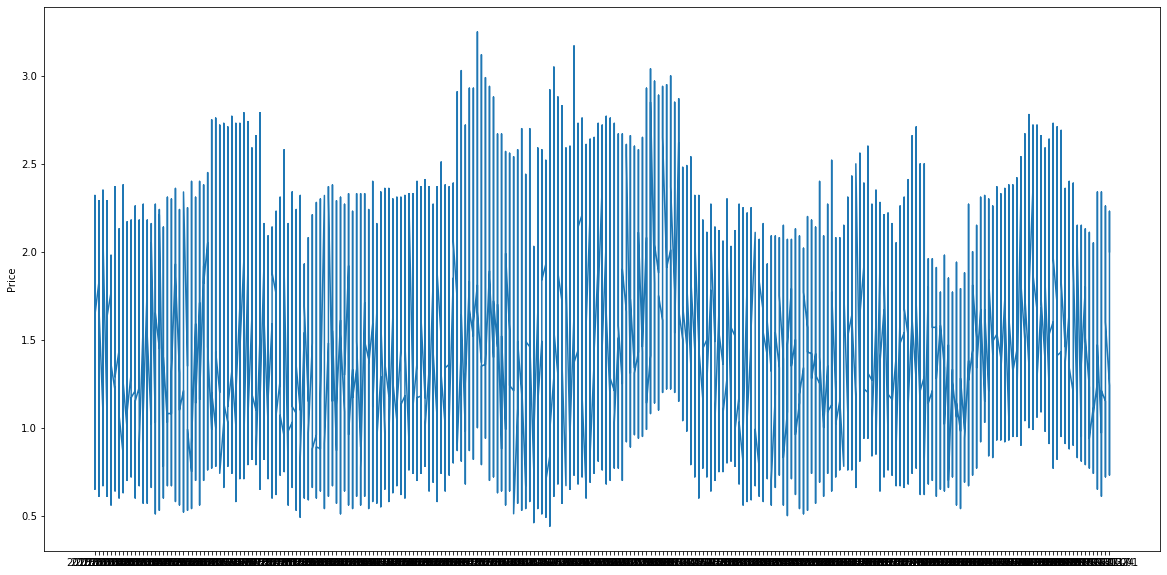

In [12]:
plt.figure(figsize=(20,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])
plt.ylabel('Price')
plt.show()

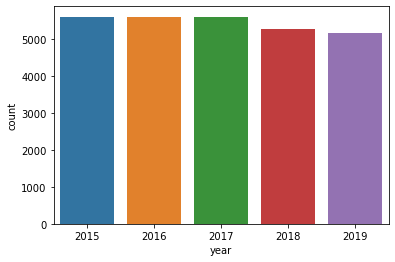

In [51]:
sns.countplot(data=avocado_df,x='year')
sns.set_context('notebook')

In [14]:
fig = px.line(avocado_df, x='Date', y='AveragePrice')
fig.show()

In [15]:
avocado_prophet_df=avocado_df[['Date','AveragePrice']]

In [16]:
avocado_prophet_df

Date  AveragePrice
0      2015-01-04          1.22
20999  2015-01-04          1.88
20947  2015-01-04          1.93
20895  2015-01-04          1.41
1771   2015-01-04          1.19
...           ...           ...
11332  2019-12-01          1.04
19175  2019-12-01          1.80
11533  2019-12-01          0.77
252    2019-12-01          1.15
15685  2019-12-01          2.00

[27323 rows x 2 columns]

In [17]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [18]:
avocado_prophet_df

ds     y
0      2015-01-04  1.22
20999  2015-01-04  1.88
20947  2015-01-04  1.93
20895  2015-01-04  1.41
1771   2015-01-04  1.19
...           ...   ...
11332  2019-12-01  1.04
19175  2019-12-01  1.80
11533  2019-12-01  0.77
252    2019-12-01  1.15
15685  2019-12-01  2.00

[27323 rows x 2 columns]

In [19]:
m = Prophet()

In [20]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
#forcast future
future=m.make_future_dataframe(periods=365)
forcast=m.predict(future)

In [22]:
forcast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     2015-01-04  1.329073    0.946154    1.851524     1.329073     1.329073   
1     2015-01-04  1.329073    0.924825    1.892306     1.329073     1.329073   
2     2015-01-04  1.329073    0.902351    1.859066     1.329073     1.329073   
3     2015-01-04  1.329073    0.916978    1.859804     1.329073     1.329073   
4     2015-01-04  1.329073    0.919447    1.877680     1.329073     1.329073   
...          ...       ...         ...         ...          ...          ...   
27683 2020-11-26  1.245028    0.527129    1.804572     0.816402     1.649464   
27684 2020-11-27  1.245052    0.520492    1.812064     0.814257     1.651121   
27685 2020-11-28  1.245076    0.486660    1.729048     0.812112     1.653003   
27686 2020-11-29  1.245100    0.711382    2.004453     0.809967     1.656395   
27687 2020-11-30  1.245124    0.659352    1.973461     0.808108     1.660143   

       additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0            0.048989              0.048989              0.048989  0.165259   
1            0.048989              0.048989              0.048989  0.165259   
2            0.048989              0.048989              0.048989  0.165259   
3            0.048989              0.048989              0.048989  0.165259   
4            0.048989              0.048989              0.048989  0.165259   
...               ...                   ...                   ...       ...   
27683       -0.091368             -0.091368             -0.091368 -0.056486   
27684       -0.095258             -0.095258             -0.095258 -0.056486   
27685       -0.099425             -0.099425             -0.099425 -0.056486   
27686        0.117900              0.117900              0.117900  0.165259   
27687        0.065168              0.065168              0.065168  0.117172   

       weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0          0.165259      0.165259 -0.116270     -0.116270     -0.116270   
1          0.165259      0.165259 -0.116270     -0.116270     -0.116270   
2          0.165259      0.165259 -0.116270     -0.116270     -0.116270   
3          0.165259      0.165259 -0.116270     -0.116270     -0.116270   
4          0.165259      0.165259 -0.116270     -0.116270     -0.116270   
...             ...           ...       ...           ...           ...   
27683     -0.056486     -0.056486 -0.034881     -0.034881     -0.034881   
27684     -0.056486     -0.056486 -0.038771     -0.038771     -0.038771   
27685     -0.056486     -0.056486 -0.042939     -0.042939     -0.042939   
27686      0.165259      0.165259 -0.047360     -0.047360     -0.047360   
27687      0.117172      0.117172 -0.052004     -0.052004     -0.052004   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...                     ...                         ...   
27683                   0.0                         0.0   
27684                   0.0                         0.0   
27685                   0.0                         0.0   
27686                   0.0                         0.0   
27687                   0.0                         0.0   

       multiplicative_terms_upper      yhat  
0                             0.0  1.378062  
1                             0.0  1.378062  
2                             0.0  1.378062  
3                             0.0  1.378062  
4                             0.0  1.378062  
...                           ...       ...  
27683                         0.0  1.153660  
27684                         0.0  1.149794  
27685                         0.0  1.145650  
27686                         0.0 

In [23]:
forcast.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
27683 2020-11-26  1.245028    0.527129    1.804572     0.816402     1.649464   
27684 2020-11-27  1.245052    0.520492    1.812064     0.814257     1.651121   
27685 2020-11-28  1.245076    0.486660    1.729048     0.812112     1.653003   
27686 2020-11-29  1.245100    0.711382    2.004453     0.809967     1.656395   
27687 2020-11-30  1.245124    0.659352    1.973461     0.808108     1.660143   

       additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
27683       -0.091368             -0.091368             -0.091368 -0.056486   
27684       -0.095258             -0.095258             -0.095258 -0.056486   
27685       -0.099425             -0.099425             -0.099425 -0.056486   
27686        0.117900              0.117900              0.117900  0.165259   
27687        0.065168              0.065168              0.065168  0.117172   

       weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
27683     -0.056486     -0.056486 -0.034881     -0.034881     -0.034881   
27684     -0.056486     -0.056486 -0.038771     -0.038771     -0.038771   
27685     -0.056486     -0.056486 -0.042939     -0.042939     -0.042939   
27686      0.165259      0.165259 -0.047360     -0.047360     -0.047360   
27687      0.117172      0.117172 -0.052004     -0.052004     -0.052004   

       multiplicative_terms  multiplicative_terms_lower  \
27683                   0.0                         0.0   
27684                   0.0                         0.0   
27685                   0.0                         0.0   
27686                   0.0                         0.0   
27687                   0.0                         0.0   

       multiplicative_terms_upper      yhat  
27683                         0.0  1.153660  
27684                         0.0  1.149794  
27685                         0.0  1.145650  
27686                         0.0  1.362999  
27687                         0.0  1.310292

In [24]:
fig = px.line(forcast, x='ds', y='trend')
fig.show()

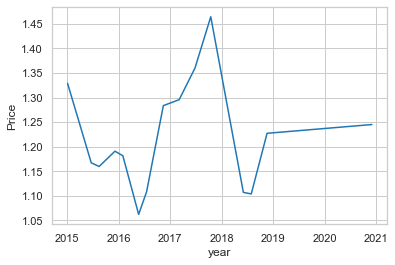

In [25]:
sns.set_style('whitegrid')
plt.plot(forcast['ds'],forcast['trend'])
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

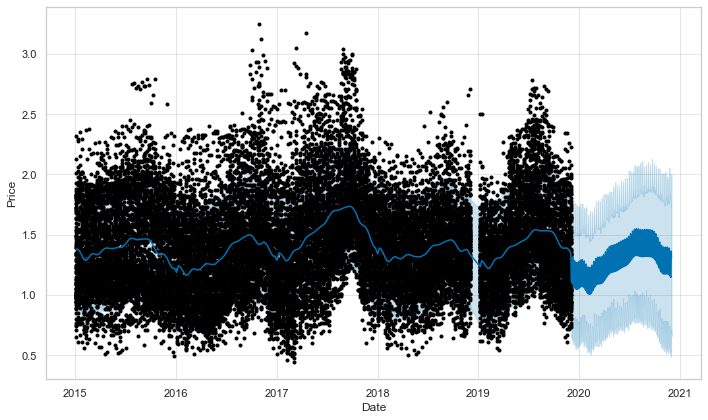

In [26]:
m.plot(forcast,xlabel='Date',ylabel='Price')
plt.show()

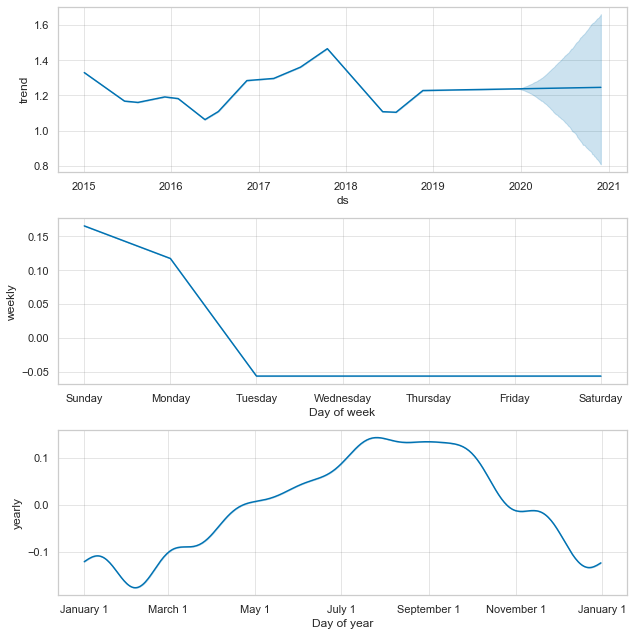

In [27]:
m.plot_components(forcast)
plt.show()

In [28]:
avocado_df=pd.read_csv('Avocado.csv')

In [29]:
avocado_df

Date  AveragePrice  Total Volume     4046      4225    4770  \
0      2015-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1      2015-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2      2015-01-18          1.17      44511.28   914.14  31540.32  135.77   
3      2015-01-25          1.06      45147.50   941.38  33196.16  164.14   
4      2015-02-01          0.99      70873.60  1353.90  60017.20  179.32   
...           ...           ...           ...      ...       ...     ...   
27318  2015-11-22          1.97       6249.43  1733.40   2873.92   30.95   
27319  2015-11-29          2.08       4638.10  1395.02   2238.04   61.71   
27320  2015-12-13          1.80       7836.65  2194.49   2981.01   25.97   
27321  2015-12-20          1.92       6255.19  1512.45   2407.32   11.78   
27322  2015-12-27          1.81       7155.63  1478.79   2629.64   14.10   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         9716.46     9186.93      529.53          0.0  conventional  2015   
1         8424.77     8036.04      388.73          0.0  conventional  2015   
2        11921.05    11651.09      269.96          0.0  conventional  2015   
3        10845.82    10103.35      742.47          0.0  conventional  2015   
4         9323.18     9170.82      152.36          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
27318     1611.16     1590.00       21.16          0.0       organic  2015   
27319      943.33      943.33        0.00          0.0       organic  2015   
27320     2635.18     2598.45       36.73          0.0       organic  2015   
27321     2323.64     2213.72      109.92          0.0       organic  2015   
27322     3033.10     2855.55      177.55          0.0       organic  2015   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
27318  WestTexNewMexico  
27319  WestTexNewMexico  
27320  WestTexNewMexico  
27321  WestTexNewMexico  
27322  WestTexNewMexico  

[27323 rows x 13 columns]

In [36]:
avocado_df_sample=avocado_df[avocado_df['region']=='Chicago']

In [37]:
avocado_df_sample

Date  AveragePrice  Total Volume      4046       4225       4770  \
2024   2015-01-04          1.11     783068.03  30270.26  550752.19  124506.10   
2025   2015-01-11          1.15     802874.94  31239.94  558487.79  133848.57   
2026   2015-01-18          1.14     797741.43  24917.77  533717.99  140239.95   
2027   2015-01-25          1.22     745439.17  26117.56  488218.44  145882.24   
2028   2015-02-01          0.91    1133491.66  50783.91  824745.44  164884.41   
...           ...           ...           ...       ...        ...        ...   
15934  2019-11-03          1.07      84378.35   1317.38   11724.86       0.00   
15935  2019-11-10          1.57      54554.00    891.00    8018.00       0.00   
15936  2019-11-17          1.53      74726.00   1274.00   10643.00       0.00   
15937  2019-11-24          1.62      50428.00    960.00    6951.00       0.00   
15938  2019-12-01          1.24      62297.00    783.00    9139.00       0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
2024     77539.48    72888.46     4651.02         0.00  conventional  2015   
2025     79298.64    74716.43     4539.25        42.96  conventional  2015   
2026     98865.72    95516.44     3311.71        37.57  conventional  2015   
2027     85220.93    75867.61     9265.81        87.51  conventional  2015   
2028     93077.90    89516.93     3448.62       112.35  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
15934    71336.11    71336.11        0.00         0.00       organic  2019   
15935    45645.00    44972.00      673.00         0.00       organic  2019   
15936    62810.00    62712.00       97.00         0.00       organic  2019   
15937    42517.00    40212.00     2305.00         0.00       organic  2019   
15938    52375.00    41834.00    10541.00         0.00       organic  2019   

        region  
2024   Chicago  
2025   Chicago  
2026   Chicago  
2027   Chicago  
2028   Chicago  
...        ...  
15934  Chicago  
15935  Chicago  
15936  Chicago  
15937  Chicago  
15938  Chicago  

[506 rows x 13 columns]

In [38]:
avocado_df_sample=avocado_df_sample.sort_values('Date')

In [39]:
avocado_df_sample

Date  AveragePrice  Total Volume       4046       4225  \
2024   2015-01-04          1.11     783068.03   30270.26  550752.19   
15686  2015-01-04          1.49      17723.17    1189.35   15628.27   
2025   2015-01-11          1.15     802874.94   31239.94  558487.79   
15687  2015-01-11          1.79      12915.74    1426.75   10900.10   
2026   2015-01-18          1.14     797741.43   24917.77  533717.99   
...           ...           ...           ...        ...        ...   
2274   2019-11-17          1.28     596948.00  116420.00  182650.00   
15937  2019-11-24          1.62      50428.00     960.00    6951.00   
2275   2019-11-24          1.41     535639.00   65894.00  166254.00   
2276   2019-12-01          1.33     549446.00  100405.00  158339.00   
15938  2019-12-01          1.24      62297.00     783.00    9139.00   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
2024   124506.10    77539.48    72888.46     4651.02         0.00   
15686       0.00      905.55      905.55        0.00         0.00   
2025   133848.57    79298.64    74716.43     4539.25        42.96   
15687       0.00      588.89      588.89        0.00         0.00   
2026   140239.95    98865.72    95516.44     3311.71        37.57   
...          ...         ...         ...         ...          ...   
2274    42497.00   255382.00   205060.00    45470.00      4852.00   
15937       0.00    42517.00    40212.00     2305.00         0.00   
2275    42477.00   261014.00   204652.00    54548.00      1813.00   
2276    39467.00   251234.00   181783.00    69137.00       314.00   
15938       0.00    52375.00    41834.00    10541.00         0.00   

               type  year   region  
2024   conventional  2015  Chicago  
15686       organic  2015  Chicago  
2025   conventional  2015  Chicago  
15687       organic  2015  Chicago  
2026   conventional  2015  Chicago  
...             ...   ...      ...  
2274   conventional  2019  Chicago  
15937       organic  2019  Chicago  
2275   conventional  2019  Chicago  
2276   conventional  2019  Chicago  
15938       organic  2019  Chicago  

[506 rows x 13 columns]

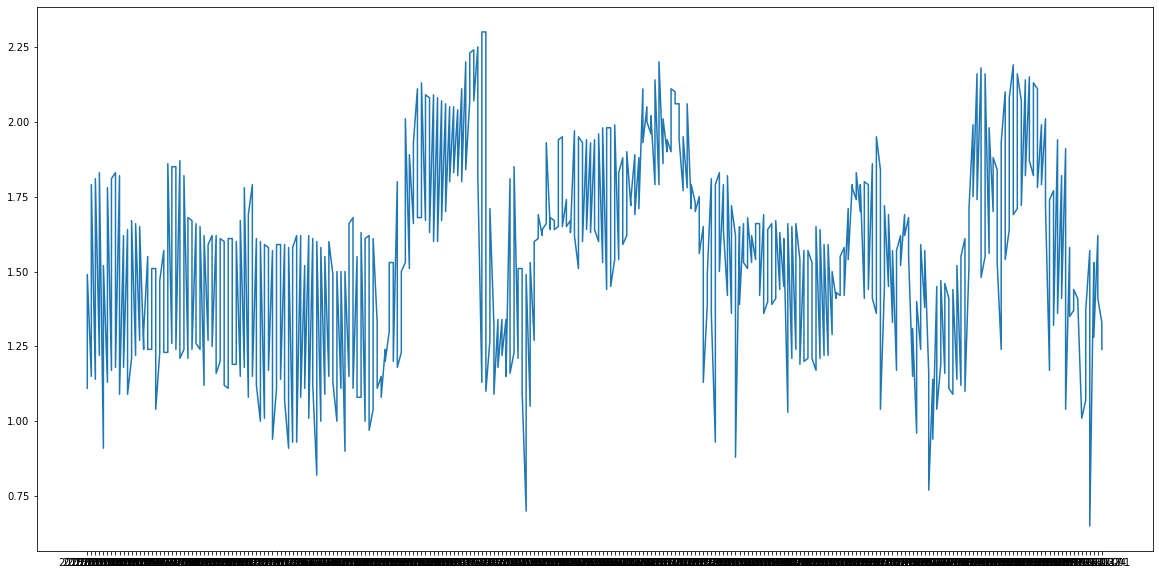

In [40]:
plt.figure(figsize=(20,10))
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])
plt.show()

In [41]:
avocado_df_sample=avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [42]:
avocado_df_sample

ds     y  Total Volume       4046       4225       4770  \
2024   2015-01-04  1.11     783068.03   30270.26  550752.19  124506.10   
15686  2015-01-04  1.49      17723.17    1189.35   15628.27       0.00   
2025   2015-01-11  1.15     802874.94   31239.94  558487.79  133848.57   
15687  2015-01-11  1.79      12915.74    1426.75   10900.10       0.00   
2026   2015-01-18  1.14     797741.43   24917.77  533717.99  140239.95   
...           ...   ...           ...        ...        ...        ...   
2274   2019-11-17  1.28     596948.00  116420.00  182650.00   42497.00   
15937  2019-11-24  1.62      50428.00     960.00    6951.00       0.00   
2275   2019-11-24  1.41     535639.00   65894.00  166254.00   42477.00   
2276   2019-12-01  1.33     549446.00  100405.00  158339.00   39467.00   
15938  2019-12-01  1.24      62297.00     783.00    9139.00       0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
2024     77539.48    72888.46     4651.02         0.00  conventional  2015   
15686      905.55      905.55        0.00         0.00       organic  2015   
2025     79298.64    74716.43     4539.25        42.96  conventional  2015   
15687      588.89      588.89        0.00         0.00       organic  2015   
2026     98865.72    95516.44     3311.71        37.57  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
2274    255382.00   205060.00    45470.00      4852.00  conventional  2019   
15937    42517.00    40212.00     2305.00         0.00       organic  2019   
2275    261014.00   204652.00    54548.00      1813.00  conventional  2019   
2276    251234.00   181783.00    69137.00       314.00  conventional  2019   
15938    52375.00    41834.00    10541.00         0.00       organic  2019   

        region  
2024   Chicago  
15686  Chicago  
2025   Chicago  
15687  Chicago  
2026   Chicago  
...        ...  
2274   Chicago  
15937  Chicago  
2275   Chicago  
2276   Chicago  
15938  Chicago  

[506 rows x 13 columns]

In [43]:
m=Prophet()

In [44]:
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
#forcast future
future=m.make_future_dataframe(periods=365)
forcast=m.predict(future)

In [46]:
forcast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2015-01-04  1.190109    0.923639    1.635054     1.190109     1.190109   
1   2015-01-04  1.190109    0.911824    1.605207     1.190109     1.190109   
2   2015-01-11  1.192092    0.978594    1.710700     1.192092     1.192092   
3   2015-01-11  1.192092    0.967378    1.710698     1.192092     1.192092   
4   2015-01-18  1.194075    1.000296    1.651066     1.194075     1.194075   
..         ...       ...         ...         ...          ...          ...   
866 2020-11-26  1.209722    0.812955    1.526209     1.191409     1.229043   
867 2020-11-27  1.209500    0.819135    1.557592     1.191139     1.228896   
868 2020-11-28  1.209278    0.823425    1.471944     1.190869     1.228749   
869 2020-11-29  1.209057    0.995550    1.714956     1.190556     1.228601   
870 2020-11-30  1.208835    0.805587    1.536929     1.190280     1.228454   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          0.078415              0.078415              0.078415  0.186480   
1          0.078415              0.078415              0.078415  0.186480   
2          0.147868              0.147868              0.147868  0.186480   
3          0.147868              0.147868              0.147868  0.186480   
4          0.125152              0.125152              0.125152  0.186480   
..              ...                   ...                   ...       ...   
866       -0.041782             -0.041782             -0.041782 -0.040371   
867       -0.050168             -0.050168             -0.050168 -0.040371   
868       -0.059563             -0.059563             -0.059563 -0.040371   
869        0.156900              0.156900              0.156900  0.186480   
870       -0.025552             -0.025552             -0.025552  0.015373   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        0.186480      0.186480 -0.108065     -0.108065     -0.108065   
1        0.186480      0.186480 -0.108065     -0.108065     -0.108065   
2        0.186480      0.186480 -0.038612     -0.038612     -0.038612   
3        0.186480      0.186480 -0.038612     -0.038612     -0.038612   
4        0.186480      0.186480 -0.061328     -0.061328     -0.061328   
..            ...           ...       ...           ...           ...   
866     -0.040371     -0.040371 -0.001412     -0.001412     -0.001412   
867     -0.040371     -0.040371 -0.009798     -0.009798     -0.009798   
868     -0.040371     -0.040371 -0.019192     -0.019192     -0.019192   
869      0.186480      0.186480 -0.029580     -0.029580     -0.029580   
870      0.015373      0.015373 -0.040926     -0.040926     -0.040926   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
866                   0.0                         0.0   
867                   0.0                         0.0   
868                   0.0                         0.0   
869                   0.0                         0.0   
870                   0.0                         0.0   

     multiplicative_terms_upper      yhat  
0                           0.0  1.268525  
1                           0.0  1.268525  
2                           0.0  1.339960  
3                           0.0  1.339960  
4                           0.0  1.319227  
..                          ...       ...  
866                         0.0  1.167940  
867                         0.0  1.159332  
868                         0.0  1.149716  
869                         0.0  1.365957  
870                         0.0  1.183282  

[871 rows x 19 columns]

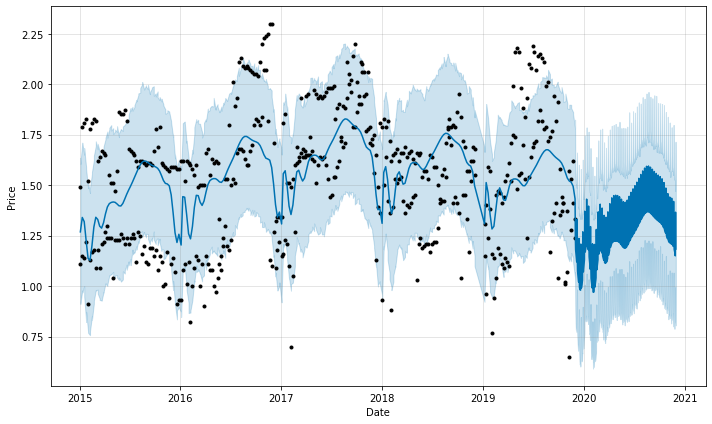

In [47]:
m.plot(forcast,xlabel='Date',ylabel='Price')
plt.show()

In [48]:
fig = px.line(forcast, x='ds', y='trend')
fig.show()

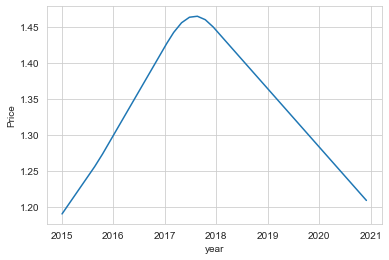

In [49]:
sns.set_style('whitegrid')
plt.plot(forcast['ds'],forcast['trend'])
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

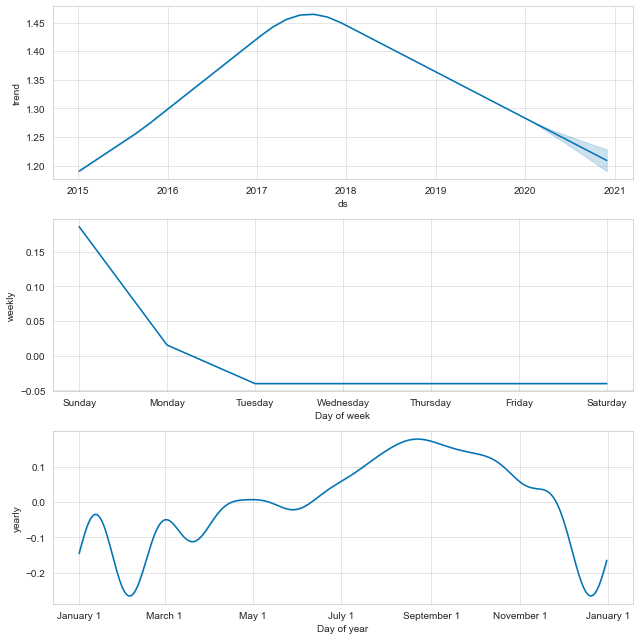

In [50]:
m.plot_components(forcast)
plt.show()

In [17]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          27323 non-null  object 
 1   AveragePrice  27323 non-null  float64
 2   Total Volume  27323 non-null  float64
 3   4046          27323 non-null  float64
 4   4225          27323 non-null  float64
 5   4770          27323 non-null  float64
 6   Total Bags    27323 non-null  float64
 7   Small Bags    27323 non-null  float64
 8   Large Bags    27323 non-null  float64
 9   XLarge Bags   27323 non-null  float64
 10  type          27323 non-null  object 
 11  year          27323 non-null  int64  
 12  region        27323 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.7+ MB
